Поколение 0: длина тура = 132353.48
Поколение 1: длина тура = 126104.39
Поколение 2: длина тура = 126999.69
Поколение 3: длина тура = 128488.37
Поколение 4: длина тура = 123204.64
Поколение 5: длина тура = 122216.70
Поколение 6: длина тура = 122696.31
Поколение 7: длина тура = 119343.22
Поколение 8: длина тура = 119949.53
Поколение 9: длина тура = 116273.13
Поколение 10: длина тура = 108020.66
Поколение 11: длина тура = 109763.37
Поколение 12: длина тура = 109763.37
Поколение 13: длина тура = 109824.22
Поколение 14: длина тура = 109824.22
Поколение 15: длина тура = 109252.36
Поколение 16: длина тура = 102866.61
Поколение 17: длина тура = 106784.20
Поколение 18: длина тура = 107679.75
Поколение 19: длина тура = 105692.38
Поколение 20: длина тура = 102332.45
Поколение 21: длина тура = 100791.39
Поколение 22: длина тура = 100791.39
Поколение 23: длина тура = 100791.39
Поколение 24: длина тура = 100712.04
Поколение 25: длина тура = 101621.02
Поколение 26: длина тура = 99850.46
Поколение 27

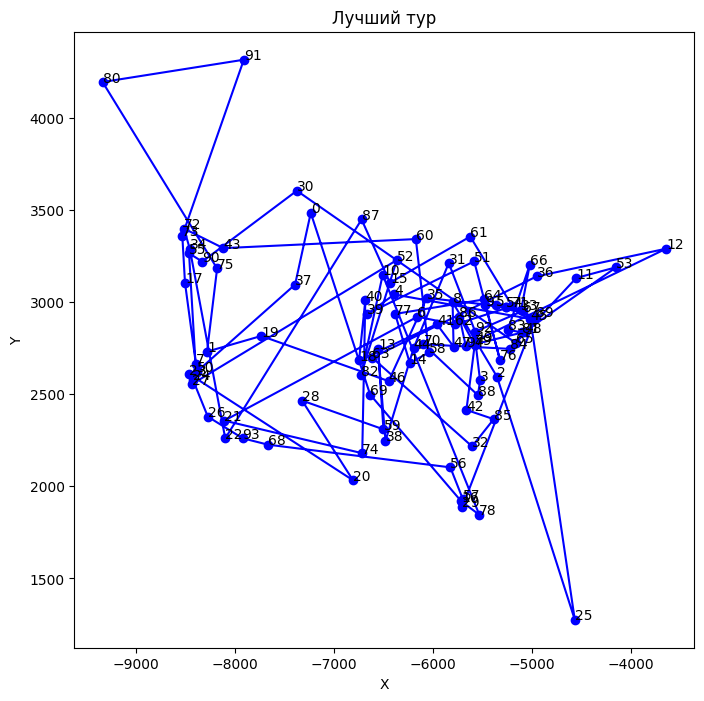

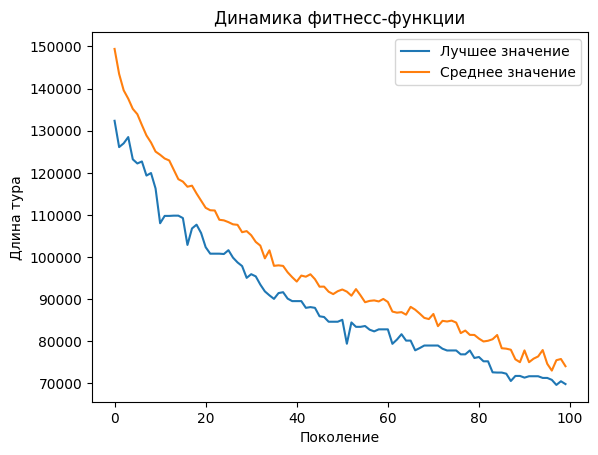

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools


cities = np.loadtxt("/content/sample_data/data.txt")
NUM_CITIES = len(cities)


POP_SIZE = 50
CXPB = 0.8
MUTPB = 0.2
NGEN = 100


def tour_length(ind):
    length = 0
    for i in range(len(ind)):
        city1 = cities[ind[i - 1]]
        city2 = cities[ind[i]]
        length += np.linalg.norm(city1 - city2)
    return (length,)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(NUM_CITIES), NUM_CITIES)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", tour_length)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOrdered)  # Order Crossover
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)


population = toolbox.population(n=POP_SIZE)
best_history = []
avg_history = []

for gen in range(NGEN):
    # Оценка фитнеса
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    fits = [ind.fitness.values[0] for ind in population]
    best_history.append(min(fits))
    avg_history.append(np.mean(fits))
    best_ind = tools.selBest(population, 1)[0]

    print(f"Поколение {gen}: длина тура = {best_ind.fitness.values[0]:.2f}")

    # Селекция
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    # Кроссинговер
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    # Мутация
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    population[:] = offspring


best_tour = tools.selBest(population, 1)[0]
tour_coords = cities[best_tour + [best_tour[0]]]  # замкнуть тур

plt.figure(figsize=(8,8))
plt.plot(tour_coords[:,0], tour_coords[:,1], 'o-', color='blue')
for i, (x,y) in enumerate(tour_coords[:-1]):
    plt.text(x, y, str(best_tour[i]))
plt.title('Лучший тур')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


plt.plot(best_history, label='Лучшее значение')
plt.plot(avg_history, label='Среднее значение')
plt.xlabel('Поколение')
plt.ylabel('Длина тура')
plt.title('Динамика фитнесс-функции')
plt.legend()
plt.show()
